In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('updated_pollution_dataset.csv')

In [3]:
# Separate features and target
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

In [4]:
# Encode target variable
y = y.map({'Good': 0, 'Moderate': 1, 'Poor': 2, 'Hazardous': 3})

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize and train the SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [8]:
# Make predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [9]:
# Calculate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy: {accuracy_rbf:.2f}")

Accuracy: 0.94


In [10]:
# Generate classification report
print("\nClassification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))


Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.95      0.96      0.96       294
           2       0.83      0.87      0.85       186
           3       0.89      0.81      0.85       111

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



In [28]:
confusion_matrix(y_test,y_pred_rbf)

array([[409,   0,   0,   0],
       [  0, 282,  12,   0],
       [  0,  14, 161,  11],
       [  0,   0,  21,  90]], dtype=int64)

In [34]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    svm_rbf, X_train_scaled, y_train,
    cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [36]:
# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

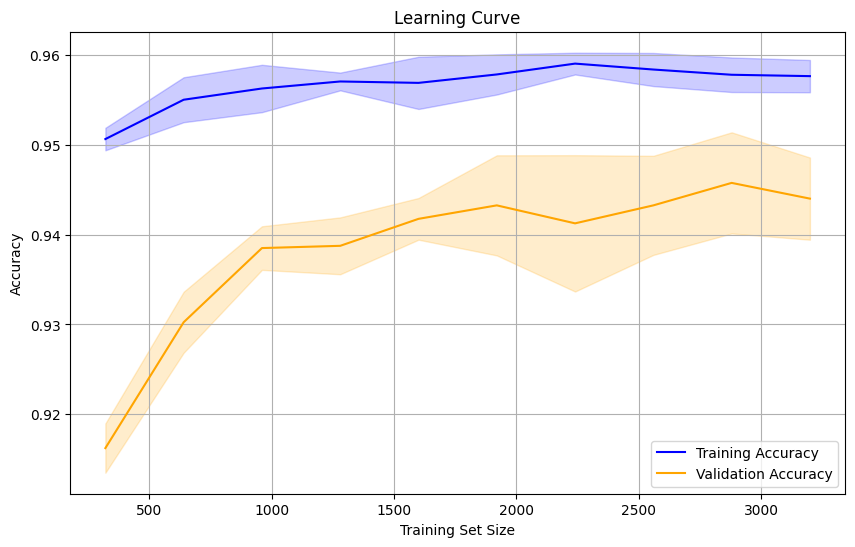

In [40]:
import matplotlib.pyplot as plt
# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()